In [4]:
import daft
import seaborn as sns
import matplotlib.pyplot as plt

# Define the range of years and taxi types

# yg_years = range(2014,2024)
# fhvhv_years = range(2019, 2024)  # Generate years from 2012 to 2023

# # Generate parquet paths for each taxi type

# yellow_parquet_paths = [f"s3://kubox-public-datasets/nyc-tlc/yellow_tripdata_{year}*.parquet" for year in yg_years]
# green_parquet_paths = [f"s3://kubox-public-datasets/nyc-tlc/green_tripdata_{year}*.parquet" for year in yg_years]
# fhvhv_parquet_paths = [f"s3://kubox-public-datasets/nyc-tlc/fhvhv_tripdata_{year}*.parquet" for year in fhvhv_years]

In [9]:
yellow_parquet_paths = "./../data/yellow_sample.parquet/"
green_parquet_paths = "./../data/green_sample.parquet/"
fhvhv_parquet_paths = "./../data/fhvhv_sample.parquet/"

In [10]:
yellow_df = daft.read_parquet(yellow_parquet_paths)
green_df = daft.read_parquet(green_parquet_paths)
fhvhv_df = daft.read_parquet(fhvhv_parquet_paths)

In [11]:
# Group by year and count the number of trips
yellow_result = (
    yellow_df.select(
        # Extract year from the pickup datetime column
        yellow_df["tpep_pickup_datetime"].dt.year().alias("year"),
        yellow_df["tpep_pickup_datetime"].alias("pick_datetime"),
        yellow_df["tpep_pickup_datetime"],
        (yellow_df["fare_amount"] * 0 + 1).alias("type"),
    )
    .groupby(["year", "type"])
    .agg(yellow_df["tpep_pickup_datetime"].count().alias("trip_count"))
    .sort("year", desc=False)
)

In [ ]:
# Group by year and count the number of trips
green_result = (
    green_df.select(
        # Extract year from the pickup datetime column
        green_df["lpep_pickup_datetime"].dt.year().alias("year"),
        green_df["lpep_pickup_datetime"].alias("pick_datetime"),
        green_df["lpep_pickup_datetime"],
        (green_df["fare_amount"] * 0 + 2).alias("type"),
    )
    .groupby(["year", "type"])
    .agg(green_df["lpep_pickup_datetime"].count().alias("trip_count"))
    .sort("year", desc=False)
)

In [13]:
# Group by year and count the number of trips
fhvhv_result = (
    fhvhv_df.select(
        # Extract year from the pickup datetime column
        fhvhv_df["pickup_datetime"].dt.year().alias("year"),
        fhvhv_df["pickup_datetime"].alias("pick_datetime"),
        fhvhv_df["pickup_datetime"],
        (fhvhv_df["base_passenger_fare"] * 0 + 3).alias("type"),
    )
    .groupby(["year", "type"])
    .agg(fhvhv_df["pickup_datetime"].count().alias("trip_count"))
    .sort("year", desc=False)
)

In [14]:
# Concatenate all DataFrames
combined_df = yellow_result.concat(green_result).concat(fhvhv_result)

In [15]:
# Convert the result to a Pandas DataFrame
df = combined_df.to_pandas()
# Drop rows where all values are NaN
final_df = df.dropna(how="all")

/Users/chinkit/dev/kubox/notebooks/basic/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
# plot_df = final_df[final_df["trip_count"] > 1300]
plot_df = final_df[final_df["trip_count"] > 10]

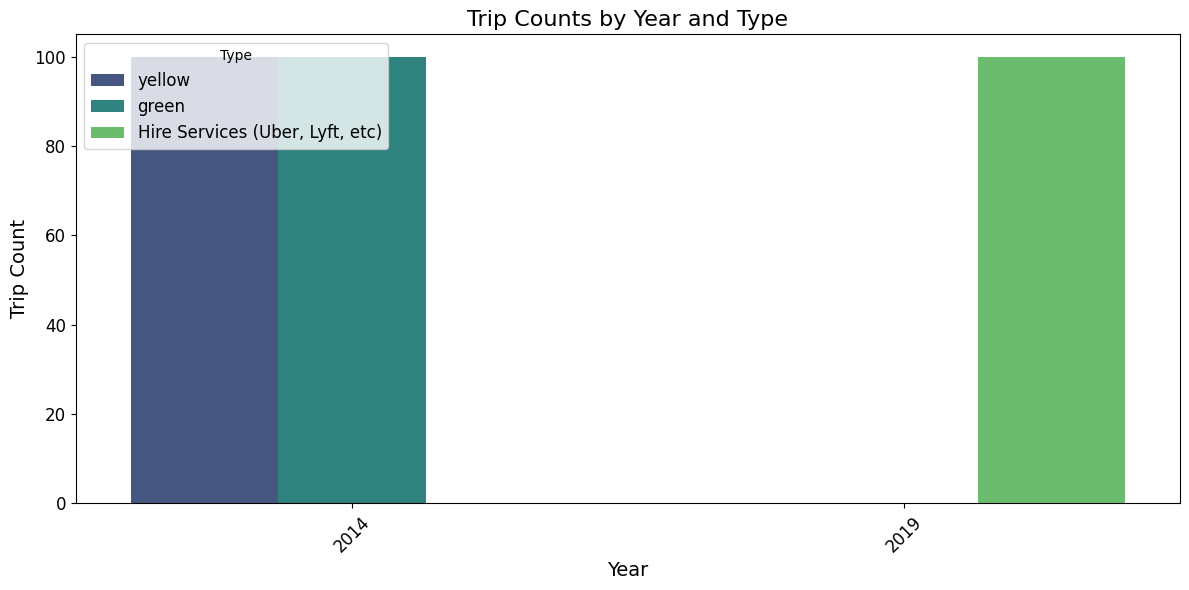

In [ ]:
if plot_df.count().sum() > 0:

    # Map numerical types to descriptive labels
    type_mapping = {1: "yellow", 2: "green", 3: "Hire Services (Uber, Lyft, etc)"}

    plot_df["type"] = plot_df["type"].map(type_mapping)

    # Prepare data for Seaborn
    grouped_data = plot_df

    # Create a grouped bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=grouped_data, x="year", y="trip_count", hue="type", palette="viridis"
    )

    # Add titles and labels
    plt.title("Trip Counts by Year and Type", fontsize=16)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Trip Count", fontsize=14)

    # Adjust x-axis ticks for better readability
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)

    # Add legend
    plt.legend(title="Type", fontsize=12, loc="upper left")

    # Show the plot
    plt.tight_layout()
    plt.show()

else:
    print("No data available to plot.")